<a href="https://colab.research.google.com/github/Safal177/Streaming-AI-supported-healthcare-assistance-platform-with-LangGraph-and-RAG/blob/main/Healthcare_Support_AI_Agents_LangGraph_RAG_LLM_Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Streaming AI-supported healthcare assistance platform with LangGraph and Retrieval-Augmented Generation

In [ ]:
"""
# Title
Agentic Healthcare customer support system using LangGraph with streaming and RAG-supported LLM Workflows

# Project overview:
Current healthcare support systems are used to solve a range of customers’ questions: from administrative questions to emergency medical queries.
First-generation chatbots which are used rule based tasks, can handle with semantic understanding and self-directed decision processes.
To overcome these limitations, agentic AI system is considered. It

•	Identifies user goals and emotions.
•	Incorporates RAG for accurate knowledge responses.
•	Dispatches user questions automatically with workflow decision graph.
•	Routes to human agents.
•	Streams emergency medical operations
•	Supports live and non-live LLM processing

# Mission of the Project:
The objective of this project (end-to-end Agentic AI pipelines with LLM) includes
•	Tags healthcare customer questions.
•	Interprets user feelings.
•	Allocates queries based on context using a graph associated agent.
•	Runs agents in live streaming approach for questions responses.
•	Creates evidence-based results using RAG.
•	Sends user questions to either human agent (or medical team).

# Core tools:
•	google.colab (Python) |
•	Jupyter Widgets | LangChain | LangGraph | OpenAI (gpt-4o, LLM) GPT-4o.
•	Vector Database (Chroma) | Prompt Engineering | TypedDict.
•	Retrieval-Augmented Generation (RAG).
•	Real time and planned LLM Tasks.

# Notable Features:
•	Multi-Agent graph framework
•	Automated query sorting
•	Emotion-sensitive routing
•	RAG
•	Human involved in the loop pipeline
•	Urgent medical response workflow
•	Online and offline performance
•	Fully configured operational framework

# Project file:
Healthcare_Support_Agents_LangGraph_RAG_LLM_Pipelines.ipynb

"""


# Load LLM workflow components for Agentic AI systems (Agentic router with RAG and Sentiment processing)

In [2]:
!pip install langchain==0.3.21

In [3]:
!pip install langchain-community==0.3.20

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.6 MB/s eta 0:00:00


In [4]:
!pip install langchain-openai==0.3.9

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.6/948.6 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 2.14.0
    Uninstalling openai-2.14.0:
      Successfully uninstalled openai-2.14.0


In [5]:
!pip install langgraph==0.3.18

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.5/136.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: langgraph-sdk
    Found existing installation: langgraph-sdk 0.3.1
    Uninstalling langgraph-sdk-0.3.1:
      Successfully uninstalled langgraph-sdk-0.3.1
  Attempting uninstall: langgraph-checkpoint
    Found existing installation: langgraph-checkpoint 3.0.1
    Uninstalling langgraph-checkpoint-3.0.1:
      Successfully uninstalled langgraph-checkpoint-3.0.1
  Attempting uninstall: langgraph-prebuilt
    Found existing installation: langgraph-prebuilt 1.0.5
    Uninstalling langgraph-prebuilt-1.0.5:
      Successfully uninstalled langgraph-prebuilt-1.0.5
  Attempting uninstall: langgraph
    Found existing installation: langgraph 1.0.5
    Uninstalling langgraph-1.0.5:
      Successfully uninstalled langgraph-1.0.5


In [6]:
import langchain

In [7]:
import langchain_community

In [8]:
import langchain_openai

In [10]:
import langgraph

In [1]:
!pip install langchain-chroma==0.2.2

In [3]:
import os

In [4]:
from getpass import getpass

os.environ['OPENAI_API_KEY'] = getpass('put OpenAI API key: ')

put OpenAI API key: ··········


#  Load information from outside files from where the AI can answer user questions

In [5]:
!pip install --quiet gdown

In [6]:
# Load healthcare knowledge base (KB) documents

!gdown 1_bQj7VkXDMwwqJmspFgRzH2mgK1CVMUY

Downloading...
From: https://drive.google.com/uc?id=1_bQj7VkXDMwwqJmspFgRzH2mgK1CVMUY
To: /content/healthcare_db.json
100% 10.6k/10.6k [00:00<00:00, 17.4MB/s]


In [7]:
# Load information from a JSON file. AI can answer user questions using company data.

import json

with open('./healthcare_db.json', 'r') as read:
  external_data  = json.load(read)
external_data[:3]

[{'text': "Question: How can I view my healthcare billing statement online? Answer: You can view your billing statement by logging into your patient portal and selecting 'Billing Statements'.",
  'metadata': {'category': 'billing'}},
 {'text': 'Question: What payment methods are accepted for medical bills? Answer: We accept credit cards, bank transfers, and insurance payments for settling your medical bills.',
  'metadata': {'category': 'billing'}},
 {'text': 'Question: Can I get a detailed invoice for my medical services? Answer: Yes, a detailed invoice is available in your patient portal under the billing section.',
  'metadata': {'category': 'billing'}}]

In [8]:
external_data[10:13]

[{'text': 'Question: How do I schedule a medical appointment online? Answer: You can schedule an appointment through our patient portal by selecting your preferred date and healthcare provider.',
  'metadata': {'category': 'appointments'}},
 {'text': 'Question: Can I reschedule or cancel my appointment online? Answer: Yes, you can easily reschedule or cancel your appointment via your patient portal.',
  'metadata': {'category': 'appointments'}},
 {'text': 'Question: What doctors are available for appointments? Answer: The following doctors are available five days of the week: Dr. Smith (Cardiology), Dr. Johnson (Dermatology), Dr. Lee (Pediatrics), Dr. Patel (Orthopedics), and Dr. Garcia (Neurology). For more details check the appointment section in your portal.',
  'metadata': {'category': 'appointments'}}]

In [9]:
external_data[-1:]

[{'text': 'Question: Is my insurance information kept confidential? Answer: Yes, all insurance information is handled in strict compliance with HIPAA regulations to ensure your privacy.',
  'metadata': {'category': 'insurance'}}]

In [10]:
# For vector database processing, we need to change external data into LangChain document.

from langchain.schema import Document
from tqdm import tqdm

prepared_documents = []

for document_data in tqdm(external_data ):

  document_data_text = document_data['text']
  document_data_metadata = document_data['metadata']
  prepared_documents.append(Document( metadata = document_data_metadata, page_content = document_data_text))

prepared_documents[:2]

100%|██████████| 40/40 [00:00<00:00, 76748.47it/s]


[Document(metadata={'category': 'billing'}, page_content="Question: How can I view my healthcare billing statement online? Answer: You can view your billing statement by logging into your patient portal and selecting 'Billing Statements'."),
 Document(metadata={'category': 'billing'}, page_content='Question: What payment methods are accepted for medical bills? Answer: We accept credit cards, bank transfers, and insurance payments for settling your medical bills.')]

# Load healthcare Knowledge Base (KB) into vector database

# AI is just looking for a well-organized dataset where I can load my vector database.

In [11]:
# To create a vector database, we need to make embeddings for text documents.

from langchain_openai import OpenAIEmbeddings

openai_embedding_model = OpenAIEmbeddings(model = 'text-embedding-3-small')


In [12]:
from langchain_chroma import Chroma


# Create Chroma vector database with OpenAI embeddings
company_vector_db = Chroma.from_documents(documents = prepared_documents, embedding = openai_embedding_model, collection_name = 'knowledge_base',
                                          persist_directory = './knowledge_base', collection_metadata = {'hnsw:space': 'cosine'})


ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


# Vector store query engine

In [13]:
company_data_lookup = company_vector_db.as_retriever(search_type = 'similarity_score_threshold', search_kwargs = {'k': 4, 'score_threshold': 0.2})

In [14]:
# Find a list of available categories from chroma vector store.

metadata_results = company_vector_db._collection.get(include= ['metadatas'])

list_categories  = set()
for data in metadata_results['metadatas']:
    if 'category' in data:
        list_categories.add(data['category'])

print(list_categories)

ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event CollectionGetEvent: capture() takes 1 positional argument but 3 were given


{'billing', 'appointments', 'medical_records', 'insurance'}


In [ ]:
# Is each category working well?

In [15]:
question = 'How can I update my car insurance policy? '
general_data_filter = {'category': 'insurance'}

company_data_lookup.search_kwargs['filter'] = general_data_filter
company_data_lookup.invoke(question)

ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event CollectionQueryEvent: capture() takes 1 positional argument but 3 were given


[Document(id='a7a6bb35-51e1-4935-ad4f-bfbfdd26afdc', metadata={'category': 'insurance'}, page_content='Question: Can I add a new insurance policy to my account? Answer: Yes, you can update your insurance information through the insurance settings in your patient portal.'),
 Document(id='fcabed08-2d81-4628-b673-df4b3ee2c77e', metadata={'category': 'insurance'}, page_content='Question: How are changes in insurance policies communicated to patients? Answer: Any changes are updated in your patient portal and communicated through email notifications.'),
 Document(id='bf8ee54e-e3e2-4c1f-9f03-37fddd9a0691', metadata={'category': 'insurance'}, page_content='Question: How do I verify my insurance coverage online? Answer: Verify your insurance details by logging into our patient portal and accessing the insurance section.'),
 Document(id='133056b9-bac1-4f77-8370-0fb20c7a618c', metadata={'category': 'insurance'}, page_content='Question: What should I do if my insurance claim is denied? Answer: If

In [16]:
question = 'Can I get access for my medical records?'
general_data_filter = {'category': 'medical_records'}

company_data_lookup.search_kwargs['filter'] = general_data_filter
company_data_lookup.invoke(question)

[Document(id='4be7da9c-7e28-4074-a35f-6509634e3089', metadata={'category': 'medical_records'}, page_content='Question: Can I request a copy of my medical history? Answer: Yes, you can request a copy of your medical history through the patient portal or by contacting our records department.'),
 Document(id='5b766faf-fce5-4a8d-a9dd-b79fb7a5cb46', metadata={'category': 'medical_records'}, page_content='Question: How can I access my medical records online? Answer: You can access your medical records through our secure patient portal using your login credentials.'),
 Document(id='cb782ccb-089c-4bc7-abdf-975445b35ae0', metadata={'category': 'medical_records'}, page_content='Question: Can I authorize someone else to access my medical records? Answer: Yes, you can grant access to a trusted family member or representative via our authorization process.'),
 Document(id='6e602c30-cc62-4e15-ba69-d1a2add543d7', metadata={'category': 'medical_records'}, page_content='Question: Is there a fee for obt

In [17]:
question = 'Can I pay the due amount by credit card?'
general_data_filter = {'category':  'billing'}

company_data_lookup.search_kwargs['filter'] = general_data_filter
company_data_lookup.invoke(question)


[Document(id='23b2ae07-e2a5-4f09-871f-5896a554fb8c', metadata={'category': 'billing'}, page_content='Question: What payment methods are accepted for medical bills? Answer: We accept credit cards, bank transfers, and insurance payments for settling your medical bills.'),
 Document(id='ba2894af-a4e3-4044-923e-a3c01e1699ab', metadata={'category': 'billing'}, page_content='Question: Is there a discount for upfront payment of my medical bill? Answer: Some facilities offer discounts for upfront payments; please contact our billing department for details.'),
 Document(id='78113614-4cff-4d10-9ac4-dda5f758f174', metadata={'category': 'billing'}, page_content='Question: What is the process for disputing a charge on my medical bill? Answer: You can dispute any charges by contacting our billing department and submitting a formal inquiry.'),
 Document(id='cc8d54e9-e73a-44e6-bb7f-d7d4c1fe58f7', metadata={'category': 'billing'}, page_content='Question: Can I get a detailed invoice for my medical serv

In [18]:
question = 'Can you help me schedule an appointment with my regular doctor?'
general_data_filter = {'category': 'appointments'}

company_data_lookup.search_kwargs['filter'] = general_data_filter
company_data_lookup.invoke(question)


[Document(id='5f0c5e5b-30d3-4fb8-be77-a4a7ec3c4dd8', metadata={'category': 'appointments'}, page_content='Question: How do I schedule a medical appointment online? Answer: You can schedule an appointment through our patient portal by selecting your preferred date and healthcare provider.'),
 Document(id='ff1cc517-b254-4d45-9371-4eea634cb58c', metadata={'category': 'appointments'}, page_content='Question: What doctors are available for appointments? Answer: The following doctors are available five days of the week: Dr. Smith (Cardiology), Dr. Johnson (Dermatology), Dr. Lee (Pediatrics), Dr. Patel (Orthopedics), and Dr. Garcia (Neurology). For more details check the appointment section in your portal.'),
 Document(id='bd883d93-1dab-4b81-881a-61f68ebef566', metadata={'category': 'appointments'}, page_content='Question: How do I find out which doctors are available for my appointment? Answer: Doctor availability is listed on our appointment portal; you can filter by specialty and location.

# Create the agentic RAG routing system

# Customer support interaction structure

In [19]:
from typing import TypedDict

class Support_Interaction_Record(TypedDict):
  user_question: str
  question_type: str
  question_sentiment: str
  human_support_contact: dict
  emergency_contact_information: dict
  agent_reply: str
  user_id: str

In [20]:
from pydantic import BaseModel
from typing import Literal

class Question_Type(BaseModel):
  inquiry_type: Literal['insurance', 'medical_records', 'billing', 'appointments']

In [21]:
class Question_Feeling(BaseModel):
  feeling: Literal['Good', 'Average', 'Bad', 'Emergency']

# Node functions for making a customer support pipeline

In [22]:
from langchain_openai import ChatOpenAI

chatopenai_llm = ChatOpenAI(model = 'gpt-4o', temperature=0)

In [23]:
def classify_question(support_state: Support_Interaction_Record) -> Support_Interaction_Record:
  '''
  Analyze the customer question. Find a category from insurance, medical_records, billing, or appointments which fully fits
  to the customer’s question.
  '''

  classify_prompt = f'''
  You are an experienced healthcare support agent. You can easily classify the customer questions. Please take your time to review the customer
  questions. Finally, you need to categorize questions into one of the following. 'insurance', 'medical_records', 'billing', or 'appointments'.

  Question:
  {support_state['user_question']}

  Make sure you must return one classify name only.
  '''
  inquiry_category = chatopenai_llm.with_structured_output(Question_Type).invoke(classify_prompt)
  results = chatopenai_llm.invoke(classify_prompt).content.strip().lower()
  support_state['question_type'] = results

  return support_state


In [24]:
# Check: is this function working?
classify_question({"user_question": 'Tell your user which payment methods you can consider.'})

{'user_question': 'Tell your user which payment methods you can consider.',
 'question_type': 'billing'}

In [25]:

check_state = {'user_question': 'Tell your user which payment methods you can consider.', 'question_type': '', 'question_sentiment': '',
               'human_support_contact': {}, 'emergency_contact_information': {}, 'agent_reply': '', 'user_id': 'check_state_0981'}

print(classify_question(check_state))

{'user_question': 'Tell your user which payment methods you can consider.', 'question_type': 'billing', 'question_sentiment': '', 'human_support_contact': {}, 'emergency_contact_information': {}, 'agent_reply': '', 'user_id': 'check_state_0981'}


In [26]:
classify_question({"user_question": 'how  do I change my policy?'})

{'user_question': 'how  do I change my policy?', 'question_type': 'insurance'}

In [27]:
def sentiment_analysis_node(support_state: Support_Interaction_Record) -> Support_Interaction_Record:
    '''
    Research on sentimental options such as Good, Average, Bad, Emergency on customer’s questions.
    '''

    sentiment_analysis_node_prompt = f'''
    You are an experienced healthcare customer support agent. You can easily categorize the overall customer sentiment. Please take your time to
    review the customer questions as given below. Finally, you need to categorize the sentiment into one of the following customer sentiment options.
    'Good', 'Average', 'Bad', 'Emergency'

    You need to consider the following rules:
    - Good means positive results.
    - Average means neutral.
    - Bad means negative results.
    - Emergency means serious health problems.


    Message:
    {support_state['user_question']}

    Make sure you return one of the sentiment labels.
    '''
    sentiment = chatopenai_llm.invoke(sentiment_analysis_node_prompt).content.strip()
    support_state['question_sentiment'] = sentiment
    return support_state


In [28]:
# Test the above function
sentiment_analysis_node({"user_question": 'Thank you. I appreciate your support.'})

{'user_question': 'Thank you. I appreciate your support.',
 'question_sentiment': 'Good'}

In [29]:
sentiment_analysis_node({"user_question": 'She has a serious health issue. She needs help.'})

{'user_question': 'She has a serious health issue. She needs help.',
 'question_sentiment': 'Emergency'}

In [31]:
from langchain_core.prompts import ChatPromptTemplate

# Note:  To get better output, we need to improve the  department_assistant_reply node.

def department_assistant_reply(support_state: Support_Interaction_Record) -> Support_Interaction_Record:
    '''
    Generate a department-specific response using RAG (Chroma + LLM).
    '''
    query = support_state['user_question']

    question_type = support_state['question_type']  #  'insurance', 'medical_records', 'billing', 'appointments'


    # Example:  question_type ('insurance'),  Metadata Filter ( 'insurance'),  Public name ( 'Insurance' )
    question_type_map = {'insurance': ('insurance', 'Insurance'), 'medical_records': ('medical_records', 'Medical Records'),
                         'billing': ('billing', 'Billing'), 'appointments': ('appointments', 'Appointments'), }

    # Example: filter_key, label wre  ('insurance', 'Insurance')
    filter_key, label = question_type_map[question_type]

    company_data_lookup.search_kwargs['filter'] = {'category': filter_key}       # Narrow search results

    #  Want to see matching documents.
    search_documents = company_data_lookup.invoke(query)
    source_text = '\n\n'.join(document.page_content for document in search_documents)


    chat_template = ChatPromptTemplate.from_template(
    '''
    You are an experienced healthcare customer support agent. Please provide a clear and accurate response related to {department}.
    Use ONLY the knowledge base information provided below.

    If the information is insufficient, say:
    "Sorry. I could not provide right information. Please contact customer service."

    Customer Question:
    {question}

    Knowledge Base Information:
    {context}
    ''')


    llm_pipeline =  chat_template | chatopenai_llm

    llm_output = llm_pipeline.invoke({'department': label, 'question': query, 'context': source_text}).content

    support_state['agent_reply'] = llm_output
    return support_state


In [32]:
function_test_quety = 'How can I request a copy of my medical history?'

sample_input = {'user_question': function_test_quety ,'question_type': 'medical_records'}

assistant_reply = department_assistant_reply(sample_input)

print(assistant_reply['agent_reply'])

You can request a copy of your medical history through the patient portal or by contacting our records department.


# Records customer contact details when negative sentiment is noticed.

In [33]:
import ipywidgets as widgets
from IPython.display import display

In [34]:
def gather_user_contact_information(support_state: Support_Interaction_Record) -> Support_Interaction_Record:
  '''
  Collect customer information and connect with a support agent
  '''
  form_title = widgets.HTML('<h3>Help Desk Escalation Form</h3>')

  # Input fields

  user_id_field = widgets.Text(description = 'Issue ID:')
  user_name_field = widgets.Text(description = 'Name:')
  user_email_field = widgets.Text(description = 'Email:')
  user_phone_field = widgets.Text(description = 'Phone:')
  user_contact_time_field = widgets.Text(description = 'Best Time to Call:')

  submit_request_button = widgets.Button(description = 'Submit Request')
  result_display = widgets.Output()

  def process_user_input(button):
    support_state['customer_support_details'] = {'issue_id': user_id_field.value, 'name': user_name_field.value, 'email': user_email_field.value,
                                                 'phone': user_phone_field.value, 'best_time_to_call': user_contact_time_field.value}
    with result_display:
      print('Request submitted')
    submit_request_button.disabled = True

  submit_request_button.on_click(process_user_input)

    #  Display Structure

  display(widgets.VBox([form_title, user_id_field, user_name_field, user_email_field, user_phone_field, user_contact_time_field, submit_request_button, result_display]))

  return support_state


In [35]:
request_state = {}
gather_user_contact_information(request_state)


{}

# Send the issue to a human support agent and notify the user.

In [37]:
def notify_human_support(support_state: Support_Interaction_Record) -> Support_Interaction_Record:
  '''
  Route the request to human support and inform the user.
  '''
  if 'customer_support_details' not in support_state:
    support_state['agent_reply'] = ('Apologies, your contact information was not received.\n'
    'Please try again or contact customer support directly.')
    return support_state
  customer_details = support_state['customer_support_details']

  agent_reply_text = (f'Thank you very much {customer_details.get('name', 'Customer')}.\n\n'
  f'Issue ID: {customer_details.get('issue_id', 'N/A')}\n'
  f'Email: {customer_details.get('email', 'N/A')}\n'
  f'Phone: {customer_details.get('phone', 'N/A')}\n'
  f'Requested Contact Time: {customer_details.get('best_time_to_call', 'N/A')}\n'
  'Someone from our team will reach out to you shortly.\n'
  'Thank you for your cooperation.'
  )
  support_state["agent_reply"] = agent_reply_text
  support_state["human_support_contact"] = customer_details
  return support_state


In [38]:
# test function

support_state = {'question_sentiment': 'Unhappy', 'customer_support_details': {'issue_id': 'GB-097', 'name': 'Tim', 'email': 'tim8@email.com',
                                                                               'phone': '447-000-8888', 'best_time_to_call': ' Today evening'}}

support_state = notify_human_support(support_state)
print(support_state['agent_reply'])


Thank you very much Tim.

Issue ID: GB-097
Email: tim8@email.com
Phone: 447-000-8888
Requested Contact Time:  Today evening
Someone from our team will reach out to you shortly.
Thank you for your cooperation.


# Collect patient details for emergency medical support.

In [39]:

def get_emergency_user_information(support_state: Support_Interaction_Record) -> Support_Interaction_Record:
  '''
  Collects emergency details and connects users with emergency medical staff.
  '''

  form_title = widgets.HTML('<h3>Urgent Medical Contact Form</h3>')

  user_name_field = widgets.Text(description = 'Name:', placeholder = 'User full name')
  user_phone_field = widgets.Text(description = 'Phone:', placeholder = 'Emergency contact number')
  user_medical_issue_field = widgets.Textarea(description = 'Medical Issue:', placeholder = 'share details of your emergency situation', layout = widgets.Layout(width = '90%'))

  submit_request_button = widgets.Button(description = 'Send emergency form', button_style = 'danger')
  result_display = widgets.Output()

  def manage_user_input(button):
    support_state['urgent_contact_information'] = {'name': user_name_field.value, 'phone': user_phone_field .value, 'symptoms': user_medical_issue_field.value}
    with result_display:
      result_display.clear_output()
      print('Emergency details registered. A doctor will contact you immediately.')
    submit_request_button.disabled = True

  submit_request_button.on_click(manage_user_input)

  #  Display Structure

  display(widgets.VBox([form_title, user_name_field, user_phone_field, user_medical_issue_field, submit_request_button, result_display]))

  return support_state



In [40]:
support_state = {'user_question': 'I have pain in both legs and trouble walking.', 'question_sentiment': 'Emergency'}

support_state = get_emergency_user_information(support_state)


# Send the user’s emergency details to the urgent care medical team and confirms them a doctor will contact them right away.

In [41]:
def dispatch_to_emergency_team(support_state: Support_Interaction_Record) -> Support_Interaction_Record:
  '''
  Routes emergency contact information to the medical staff and Informs the user a doctor will get in touch as soon as possible.
  '''
  # Retrieve emergency contact details collected earlier
  emergency_contact_details = support_state.get('urgent_contact_information', {})

  patient_name = emergency_contact_details.get('name', 'Patient')
  patient_phone = emergency_contact_details.get('phone', 'patient phone number')
  health_concern = emergency_contact_details.get('symptoms', 'health concern submitted')

  output_message = (f'Emergency request received.\n'
        f'Thank you {patient_name}. Your emergency message has been received.\n'
        f'A doctor will be calling you soon at {patient_phone}.\n'
        f'Mentioned problem: {health_concern}\n'
        f'Stay in touch and ask for local emergency help if needed.')

  support_state['final_response'] = output_message
  support_state['case_status'] = 'Emergency doctors informed'

  return support_state


In [42]:
support_state = dispatch_to_emergency_team(support_state)
print(support_state['final_response'])


Emergency request received.
Thank you Patient. Your emergency message has been received.
A doctor will be calling you soon at patient phone number.
Mentioned problem: health concern submitted
Stay in touch and ask for local emergency help if needed.


In [ ]:
# Check if the function works

In [43]:
support_state = {'urgent_contact_information': {'name': 'Ram', 'phone': '345-0088', 'symptoms': 'Extreme leg pain affecting walking'}}
support_state = dispatch_to_emergency_team(support_state)
print(support_state['final_response'])


Emergency request received.
Thank you Ram. Your emergency message has been received.
A doctor will be calling you soon at 345-0088.
Mentioned problem: Extreme leg pain affecting walking
Stay in touch and ask for local emergency help if needed.


# LangGraph agent workflow for query classification, sentiment analysis, and support routing

In [44]:

from langgraph.checkpoint.memory import MemorySaver

# Define the workflow state format
from typing import TypedDict

class Support_Interaction_Record(TypedDict, total=False):
    user_question: str
    question_type: str
    question_sentiment: str
    agent_reply: str
    customer_support_details: dict
    urgent_contact_information: dict
    human_support_contact: dict
    final_response: str
    case_status: str

# Assemble the graph
from langgraph.graph import StateGraph
customer_support_graph = StateGraph(Support_Interaction_Record)



customer_support_graph .add_node('classify_question', classify_question)

customer_support_graph .add_node('analyze_sentiment', sentiment_analysis_node)

customer_support_graph .add_node('gather_user_contact_information', gather_user_contact_information)

customer_support_graph .add_node('notify_human_support', notify_human_support)

customer_support_graph.add_node('get_emergency_user_information', get_emergency_user_information)

customer_support_graph.add_node('dispatch_to_emergency_team', dispatch_to_emergency_team)

customer_support_graph .add_node('generate_department_response', department_assistant_reply)


# Sentiment evaluation router

def Sentiment_evaluation_router(support_state: Support_Interaction_Record) -> str:
    sentiment_question = support_state.get('question_sentiment', '').lower()

    if sentiment_question in ['bad', 'negative']:
        return 'gather_user_contact_information'

    if sentiment_question == 'emergency':
        return 'get_emergency_user_information'

    # Default (positive and neutral) processing branch
    return 'generate_department_response'


customer_support_graph.set_entry_point('classify_question')
customer_support_graph.add_edge('classify_question', 'analyze_sentiment')


customer_support_graph.add_conditional_edges('analyze_sentiment', Sentiment_evaluation_router, ['gather_user_contact_information', 'get_emergency_user_information',
                                                                                                'generate_department_response'])

from langgraph.graph import END

customer_support_graph .add_edge('gather_user_contact_information', 'notify_human_support')
customer_support_graph.add_edge('notify_human_support', END)

customer_support_graph.add_edge('get_emergency_user_information', 'dispatch_to_emergency_team')
customer_support_graph.add_edge('dispatch_to_emergency_team', END)

customer_support_graph.add_edge("generate_department_response", END)

# Activate the workflow

from langgraph.checkpoint.memory import MemorySaver
activate_workflow_memorysaver = MemorySaver()
workflow_agent_instance_compiled = customer_support_graph.compile(checkpointer = activate_workflow_memorysaver)


## Customer support flow graph

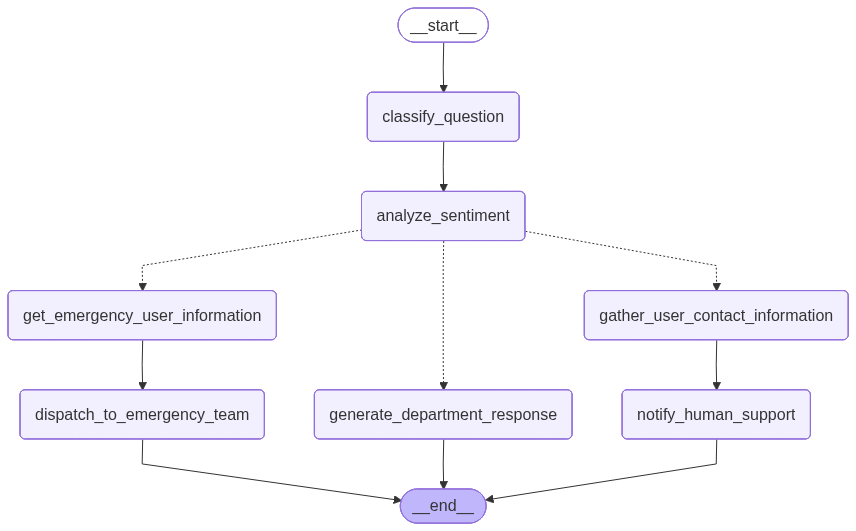

In [46]:


customer_support_pipeline_image  = workflow_agent_instance_compiled.get_graph().draw_mermaid_png()

from IPython.display import Markdown
from IPython.display import display

display(Markdown('## Customer support flow graph'))

from IPython.display import Image

display(Image(customer_support_pipeline_image))


# Execute customer support flow

In [47]:
def run_agent_workflow(agent, user_question: str, user_session_id: str, verbose: bool = False):
  '''
  Use the LangGraph to solve the query and reflect the final result supporting customer sentiment and category.
  '''

  # Stream execution
  graph_items = agent.stream({'user_question': user_question}, {'configurable': {'thread_id': user_session_id}}, stream_mode = 'values')
  last_item = None
  for  graph_item in graph_items:
        last_item =  graph_item
        if verbose:
            print(graph_item)

  question_type = last_item.get('question_type', 'N/A')
  user_question_sentiment = last_item.get('question_sentiment', 'N/A')

  response_text = (last_item.get('final_response') or last_item.get('agent_reply') or 'Sorry, we are unable to find a result at this moment.')

  # Present output clearly if needed
  display(Markdown(f'''### Workflow result summary
  ### Question category: {question_type}`
  ###  Question sentiment: {user_question_sentiment}`
  ### Support agent message

  {response_text}
  '''))
  return last_item


# Check the customer service pipeline with sample data

In [48]:
run_agent_workflow(agent = workflow_agent_instance_compiled, user_question = 'How can I request a copy of my medical history?',
                   user_session_id = 'user_session_1gb2309')


### Workflow result summary
  ### Question category: medical_records`
  ###  Question sentiment: Average`
  ### Support agent message

  You can request a copy of your medical history through the patient portal or by contacting our records department.
  

{'user_question': 'How can I request a copy of my medical history?',
 'question_type': 'medical_records',
 'question_sentiment': 'Average',
 'agent_reply': 'You can request a copy of your medical history through the patient portal or by contacting our records department.'}

In [49]:
query = 'Where can I see my account bill?'

run_agent_workflow(agent = workflow_agent_instance_compiled, user_question = query, user_session_id = 'user_session_1gb2784', verbose=False)


### Workflow result summary
  ### Question category: billing`
  ###  Question sentiment: Average`
  ### Support agent message

  You can view your account bill by logging into your patient portal and selecting 'Billing Statements'.
  

{'user_question': 'Where can I see my account bill?',
 'question_type': 'billing',
 'question_sentiment': 'Average',
 'agent_reply': "You can view your account bill by logging into your patient portal and selecting 'Billing Statements'."}

In [50]:
query = 'Which physicians are currently available?'

run_agent_workflow(agent = workflow_agent_instance_compiled, user_question = query, user_session_id = 'user_session_1g67834', verbose=False)


### Workflow result summary
  ### Question category: appointments`
  ###  Question sentiment: Average`
  ### Support agent message

  The following doctors are available five days of the week: Dr. Smith (Cardiology), Dr. Johnson (Dermatology), Dr. Lee (Pediatrics), Dr. Patel (Orthopedics), and Dr. Garcia (Neurology). For more details, please check the appointment section in your portal.
  

{'user_question': 'Which physicians are currently available?',
 'question_type': 'appointments',
 'question_sentiment': 'Average',
 'agent_reply': 'The following doctors are available five days of the week: Dr. Smith (Cardiology), Dr. Johnson (Dermatology), Dr. Lee (Pediatrics), Dr. Patel (Orthopedics), and Dr. Garcia (Neurology). For more details, please check the appointment section in your portal.'}

In [51]:
query = 'This billing problem has been very stressful, and no one is helping to resolve this problem.'

run_agent_workflow(agent = workflow_agent_instance_compiled, user_question =  query, user_session_id = '1gb57846')

### Workflow result summary
  ### Question category: billing`
  ###  Question sentiment: Bad`
  ### Support agent message

  Apologies, your contact information was not received.
Please try again or contact customer support directly.
  

{'user_question': 'This billing problem has been very stressful, and no one is helping to resolve this problem.',
 'question_type': 'billing',
 'question_sentiment': 'Bad',
 'agent_reply': 'Apologies, your contact information was not received.\nPlease try again or contact customer support directly.'}

In [52]:
query = 'My legs hurt badly and I can’t easily walk.'

run_agent_workflow(agent = workflow_agent_instance_compiled, user_question =  query, user_session_id = '1gb587906')

### Workflow result summary
  ### Question category: appointments`
  ###  Question sentiment: Emergency`
  ### Support agent message

  Emergency request received.
Thank you Patient. Your emergency message has been received.
A doctor will be calling you soon at patient phone number.
Mentioned problem: health concern submitted
Stay in touch and ask for local emergency help if needed.
  

{'user_question': 'My legs hurt badly and I can’t easily walk.',
 'question_type': 'appointments',
 'question_sentiment': 'Emergency',
 'final_response': 'Emergency request received.\nThank you Patient. Your emergency message has been received.\nA doctor will be calling you soon at patient phone number.\nMentioned problem: health concern submitted\nStay in touch and ask for local emergency help if needed.',
 'case_status': 'Emergency doctors informed'}

In [53]:
query = 'Thank you, I am going to check my doctor appointment schedule right now. '

run_agent_workflow(agent = workflow_agent_instance_compiled, user_question =  query, user_session_id = '1gb509375')

### Workflow result summary
  ### Question category: appointments`
  ###  Question sentiment: Good`
  ### Support agent message

  Sorry. I could not provide right information. Please contact customer service.
  

{'user_question': 'Thank you, I am going to check my doctor appointment schedule right now. ',
 'question_type': 'appointments',
 'question_sentiment': 'Good',
 'agent_reply': 'Sorry. I could not provide right information. Please contact customer service.'}